In [138]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [139]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1. Data Cleaning and Preparation

## 1.1 Checking if Data is Cleaned or Not

### Checking for NULL Values

In [140]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


### Checking for Duplicated Values

In [141]:
df.duplicated().sum()

0

### Checking for String Columns

In [142]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Checking for Negative Values

In [143]:
# Select numeric columns only
numeric_columns = df.select_dtypes(include=['number']).columns

# Check for negative values in numeric columns
negative_values = df[numeric_columns].lt(0).any(axis=1)

df[negative_values]


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Detecting Outliers

In [144]:
# Ensure numeric columns are used
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate z-scores
z_scores = numeric_cols.apply(zscore)

# Set the threshold for outliers
threshold = 3

# Find the indices of outliers
outliers = np.where(z_scores > threshold)

# Optionally, you can extract the outlier values from the DataFrame
outlier_values = df.iloc[outliers[0]]
print("Outlier values:\n", outlier_values)

Outlier values:
       RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
7             8    15656148      Obinna          376   Germany  Female   29   
70           71    15703793  Konovalova          738   Germany    Male   58   
85           86    15805254     Ndukaku          652     Spain  Female   75   
158         159    15589975     Maclean          646    France  Female   73   
230         231    15808473    Ringrose          673    France    Male   72   
...         ...         ...         ...          ...       ...     ...  ...   
9646       9647    15603111        Muir          850     Spain    Male   71   
9671       9672    15636061        Pope          649   Germany    Male   78   
9736       9737    15644103       Wells          659     Spain    Male   78   
9894       9895    15704795       Vagin          521    France  Female   77   
9936       9937    15653037       Parks          609    France    Male   77   

      Tenure    Balance  NumOfProd

In [145]:
print("\n\n")

## 1.2. Introducing Missing, Invalid and Duplicates Values and Recleaning Our Dataset:
#####    As the data is already cleaned so we will introduce some values so that we can show a thorough exapmle of data cleaning

In [146]:
# Step 1: Introducing missing values randomly
for col in df.columns:
    if col != 'Exited':  # Skip the 'Exited' column
        df.loc[df.sample(frac=0.1).index, col] = np.nan


# Step 2: Introducing invalid values (e.g., negative numbers in a column that should be positive)

# Creating random values for demonstration purposes. Adjust as needed.
np.random.seed(0)  # For reproducibility
df['numeric_column'] = np.random.randn(df.shape[0]) * 1000  # Random data for demonstration

# Introduce invalid values (-999) for 5% of the column
df.loc[df.sample(frac=0.05).index, 'numeric_column'] = -999

# Step 3: Introducing duplicate values
# Randomly sample rows and add them to the DataFrame
random_duplicates = df.sample(n=5, replace=True)  # Sampling 5 rows (with replacement)
df = pd.concat([df, random_duplicates])

### 1.2.1. Handle Missing Values:

In [147]:
print(df.isnull().sum())

# Filling missing values:

# For numerical columns: Fill missing values with the column mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace = True)

# For categorical columns: Fill missing values with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace = True)



RowNumber          1000
CustomerId         1000
Surname            1000
CreditScore        1001
Geography          1000
Gender             1000
Age                1002
Tenure             1002
Balance            1000
NumOfProducts      1000
HasCrCard          1000
IsActiveMember     1002
EstimatedSalary    1000
Exited                0
numeric_column        0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_25492\2297394669.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25492\2297394669.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

### 1.2.2. Dealing with Invalid Values

In [148]:
# Replace -999 with NaN
df['numeric_column'] = df['numeric_column'].replace(-999, np.nan)

# Fill NaN values with the mean of the column
mean_value = df['numeric_column'].mean()
df['numeric_column'] = df['numeric_column'].fillna(mean_value)

# erify the column
print(df['numeric_column'].describe())

# Now removing the -ve values
df['numeric_column'] = df['numeric_column'].apply(lambda x: 0 if x < 0 else x)

print("\nAfter removal of invalid values:")
print(df['numeric_column'].describe())


count    10005.000000
mean       -17.419950
std        962.500619
min      -3392.299993
25%       -645.322899
50%        -17.419950
75%        608.080864
max       3801.660215
Name: numeric_column, dtype: float64

After removal of invalid values:
count    10005.000000
mean       365.407326
std        564.952619
min          0.000000
25%          0.000000
50%          0.000000
75%        608.080864
max       3801.660215
Name: numeric_column, dtype: float64


### 1.2.3 Converting Strings to Numeric Data

In [149]:
# Encoding categorical variables using Label Encoding 
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoding.fit_transform(df[col])


### 1.2.4 Dealing with Duplicate Values

In [150]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.duplicated().sum()

5


0

### 1.2.5 Dealing with Outliers

In [151]:
# Reset the index of the DataFrame to ensure unique indices
df = df.reset_index(drop=True)

# Ensure numeric columns are used
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate z-scores
z_scores = numeric_cols.apply(zscore)

# Set the threshold for outliers
threshold = 3

# Identify rows without outliers
non_outliers = (z_scores.abs() < threshold).all(axis=1)

# Filter the dataset to remove outliers
cleaned_data = df[non_outliers].reset_index(drop=True)

# Update the original dataset
df = cleaned_data

### 1.2.6. Checking Data Integrity

In [152]:
def data_cleaning():
    print(f"Missing values in Age: {df['Age'].isnull().sum()}")
    print(f"Missing values in Balance: {df['Balance'].isnull().sum()}")
    print(f"Missing values in Estimated Salary: {df['EstimatedSalary'].isnull().sum()}")
    print(f"Missing values in Credit Score: {df['CreditScore'].isnull().sum()}")

data_cleaning()

print("\n")
print(df.info())
print(df.describe())
print("\n")

Missing values in Age: 0
Missing values in Balance: 0
Missing values in Estimated Salary: 0
Missing values in Credit Score: 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9612 non-null   float64
 1   CustomerId       9612 non-null   float64
 2   Surname          9612 non-null   int32  
 3   CreditScore      9612 non-null   float64
 4   Geography        9612 non-null   int32  
 5   Gender           9612 non-null   int32  
 6   Age              9612 non-null   float64
 7   Tenure           9612 non-null   float64
 8   Balance          9612 non-null   float64
 9   NumOfProducts    9612 non-null   float64
 10  HasCrCard        9612 non-null   float64
 11  IsActiveMember   9612 non-null   float64
 12  EstimatedSalary  9612 non-null   float64
 13  Exited           9612 non-null   int64  
 14  numeric_column   9612 no

# 2. Statistical Analysis and Data Visualization

## 2.1. Statistical Analysis

In [153]:
def print_statistical_calculations():
    # calculating mean and median of the following data sets Age,
    # Balance and EstimatedSalary Columns
    '''first we will convert data(that we want to work upon) into numpy arrays'''
    age = df["Age"].values
    balance = df["Balance"].values
    estimated_salary = df["EstimatedSalary"].values

    '''calculating the mean'''
    age_mean = np.mean(age)
    balance_mean = np.mean(balance)
    estimated_salary_mean = np.mean(estimated_salary)

    '''calculating the median'''
    age_median = np.median(age)
    balance_median = np.median(balance)
    estimated_salary_median = np.median(estimated_salary)
    print(f"Mean of Age: {age_mean}")
    print(f"Median of Age: {age_median}")
    print(f"Mean of Balance: {balance_mean}")
    print(f"Median of Balance: {balance_median}")
    print(f"Mean of Estimated Salary: {estimated_salary_mean}")
    print(f"Median of Estimated Salary: {estimated_salary_median}")

print_statistical_calculations()

Mean of Age: 38.322006307233146
Median of Age: 38.0
Mean of Balance: 76150.34334203116
Median of Balance: 85307.985
Mean of Estimated Salary: 100144.5187777266
Median of Estimated Salary: 100176.20283953358


In [154]:
# we can also find out the mean, median, mode and all the statistical data in the following way:

# Excluding the 'Exited' column for calculations
df_excl_exited = df.drop(columns=['Exited'])

# Calculating statistics
mean = df_excl_exited.mean()
median = df_excl_exited.median()
mode = df_excl_exited.mode().iloc[0]
std_dev = df_excl_exited.std()
variance = df_excl_exited.var()
correlation = df_excl_exited.corr()

In [155]:
print("Mean:\n", mean)

Mean:
 RowNumber          5.004433e+03
CustomerId         1.569124e+07
Surname            1.521592e+03
CreditScore        6.509346e+02
Geography          6.714524e-01
Gender             5.951935e-01
Age                3.832201e+01
Tenure             5.020878e+00
Balance            7.615034e+04
NumOfProducts      1.515070e+00
HasCrCard          7.046715e-01
IsActiveMember     5.140862e-01
EstimatedSalary    1.001445e+05
numeric_column     3.314472e+02
dtype: float64


In [156]:
print("Median:\n", median)

Median:
 RowNumber          5.003741e+03
CustomerId         1.569099e+07
Surname            1.578500e+03
CreditScore        6.507663e+02
Geography          0.000000e+00
Gender             1.000000e+00
Age                3.800000e+01
Tenure             5.023548e+00
Balance            8.530799e+04
NumOfProducts      1.529928e+00
HasCrCard          1.000000e+00
IsActiveMember     5.169388e-01
EstimatedSalary    1.001762e+05
numeric_column     0.000000e+00
dtype: float64


In [157]:
print("Mode:\n", mode)

Mode:
 RowNumber          5.003741e+03
CustomerId         1.569099e+07
Surname            2.342000e+03
CreditScore        6.507663e+02
Geography          0.000000e+00
Gender             1.000000e+00
Age                3.889859e+01
Tenure             5.023548e+00
Balance            0.000000e+00
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001762e+05
numeric_column     0.000000e+00
Name: 0, dtype: float64


In [158]:
print("Standard Deviation:\n", std_dev)

Standard Deviation:
 RowNumber           2734.337090
CustomerId         68166.781745
Surname              806.885245
CreditScore           91.459201
Geography              0.816058
Gender                 0.490880
Age                    8.977617
Tenure                 2.742141
Balance            59374.447759
NumOfProducts          0.521186
HasCrCard              0.432985
IsActiveMember         0.474001
EstimatedSalary    54437.485762
numeric_column       499.352420
dtype: float64


In [159]:
print("Variance:\n", variance)

Variance:
 RowNumber          7.476599e+06
CustomerId         4.646710e+09
Surname            6.510638e+05
CreditScore        8.364785e+03
Geography          6.659501e-01
Gender             2.409633e-01
Age                8.059761e+01
Tenure             7.519337e+00
Balance            3.525325e+09
NumOfProducts      2.716346e-01
HasCrCard          1.874760e-01
IsActiveMember     2.246770e-01
EstimatedSalary    2.963440e+09
numeric_column     2.493528e+05
dtype: float64


In [160]:
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                  RowNumber  CustomerId   Surname  CreditScore  Geography  \
RowNumber         1.000000    0.003401  0.001985     0.012566  -0.005880   
CustomerId        0.003401    1.000000  0.002766     0.011641   0.004780   
Surname           0.001985    0.002766  1.000000     0.001885  -0.020392   
CreditScore       0.012566    0.011641  0.001885     1.000000   0.014264   
Geography        -0.005880    0.004780 -0.020392     0.014264   1.000000   
Gender            0.013001   -0.000273 -0.002280    -0.004925   0.012109   
Age              -0.000248    0.005697  0.007808    -0.018192   0.029077   
Tenure           -0.001271   -0.014931 -0.016222    -0.002232   0.010037   
Balance          -0.006223   -0.005895  0.002228     0.016084   0.055315   
NumOfProducts     0.005447    0.021365 -0.015405     0.014141   0.004783   
HasCrCard        -0.003820   -0.016337 -0.005800     0.000248  -0.008715   
IsActiveMember   -0.000737   -0.003181  0.008370     0.022520   0.0

In [161]:
df['Exited'] = df['Exited'].astype(int)
print(df['Exited'].value_counts())

Exited
0    7700
1    1912
Name: count, dtype: int64


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2.1 Visualize Distribution of Numerical Features

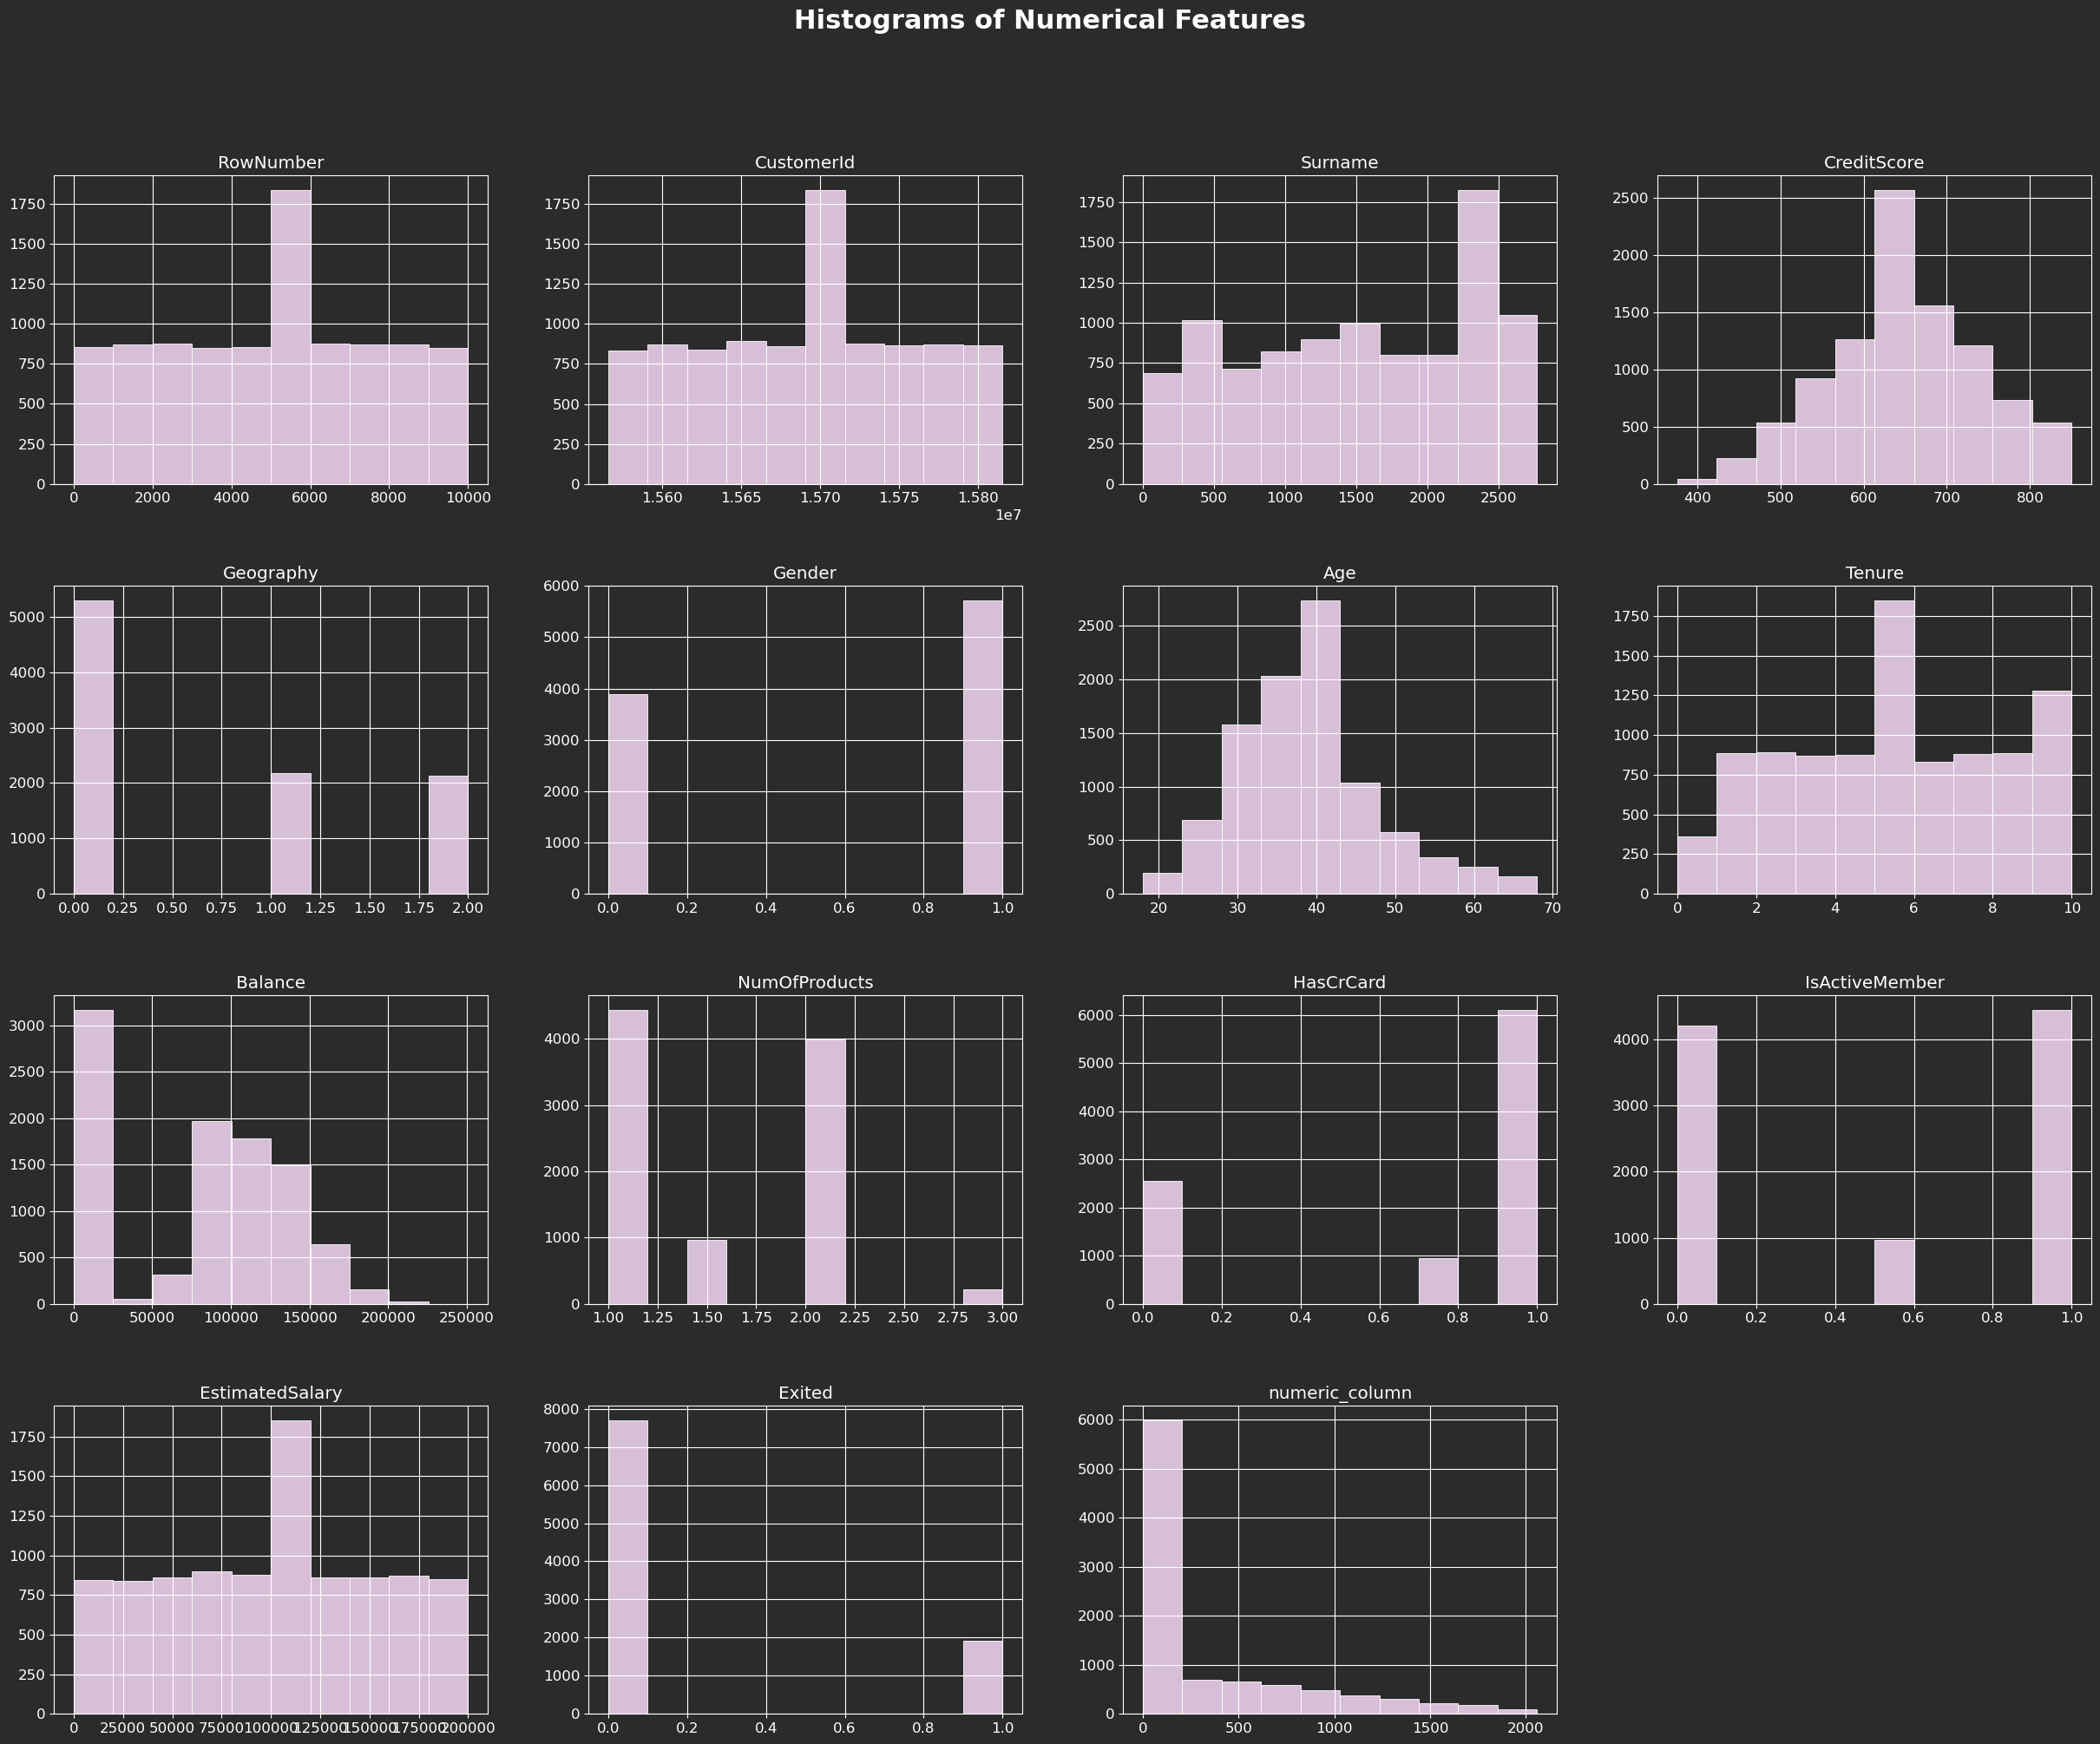

In [163]:
# Beautiful Histograms for All Numerical Columns
plt.style.use('dark_background')  # Apply dark background for aesthetic visuals
plt.rcParams['axes.facecolor'] = '#2B2B2B'  # Dark gray for axes background
plt.rcParams['axes.edgecolor'] = 'white'  # White borders for better contrast
plt.rcParams['figure.facecolor'] = '#2B2B2B'  # Dark gray for figure background
plt.rcParams['axes.labelcolor'] = 'white'  # Axis labels in white
plt.rcParams['xtick.color'] = 'white'  # X-axis ticks in white
plt.rcParams['ytick.color'] = 'white'  # Y-axis ticks in white
plt.rcParams['font.size'] = 12  # Larger font size for readability

# Creating histograms for all numeric columns
df.hist(
    bins=10,  # Number of bins for histogram
    figsize=(25, 20),  # Adjust figure size for clarity
    color='thistle',  # Soft purple color for bars
    edgecolor='white',  # White edges for sharp contrast
    linewidth=0.6  # Thin edges for a polished look
)

# Add title and style it
plt.suptitle(
    'Histograms of Numerical Features', 
    fontsize=22, 
    y=1.02, 
    color='white', 
    weight='bold'
)

# Add gridlines and improve layout
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')  # Gray dashed gridlines
plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
plt.show()



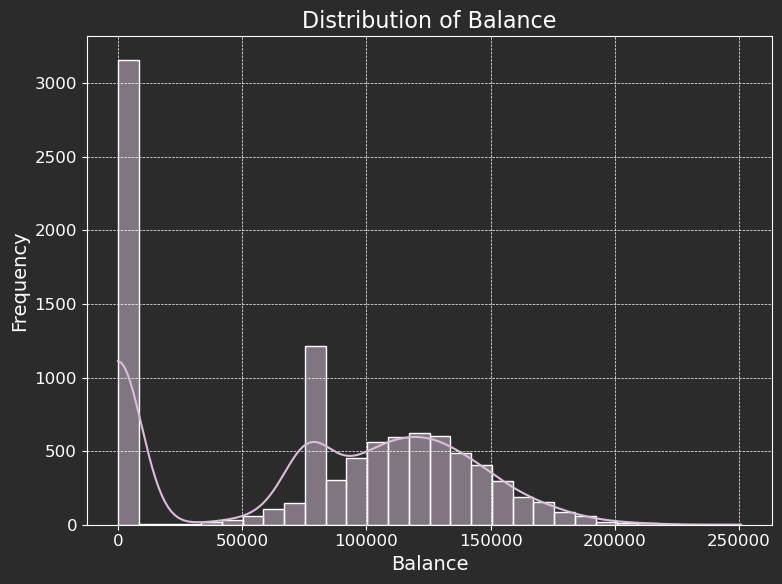

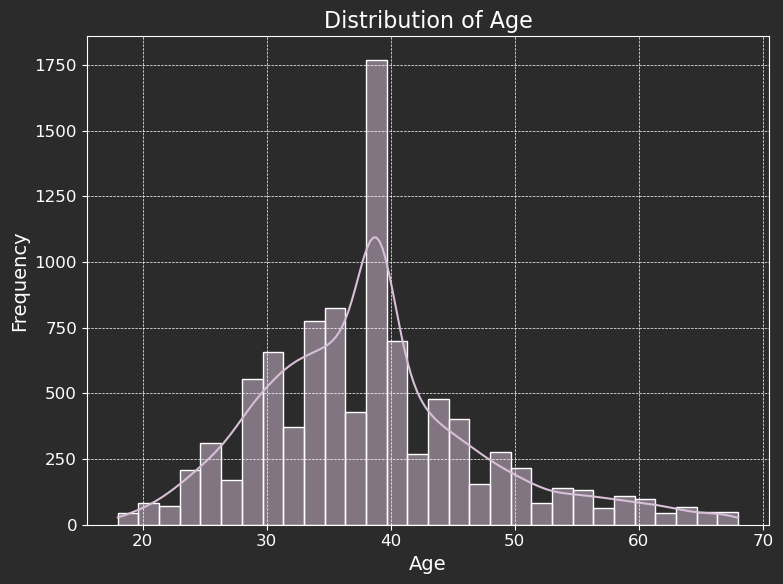

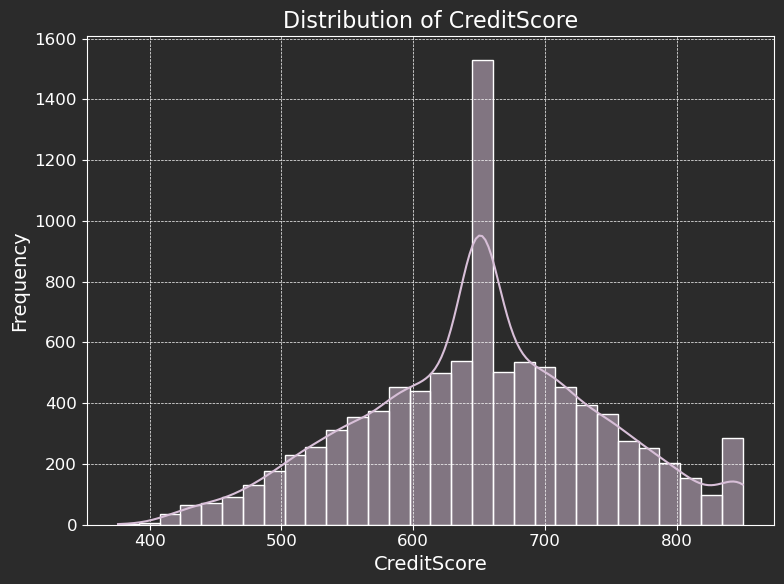

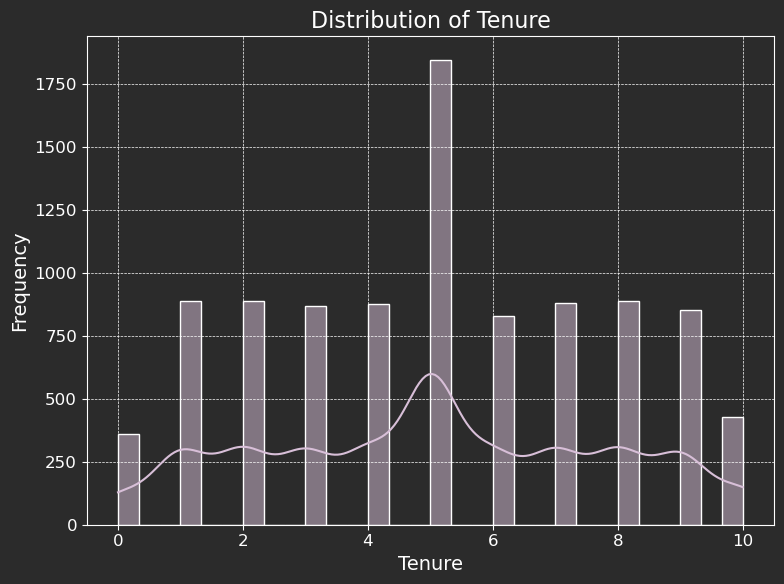

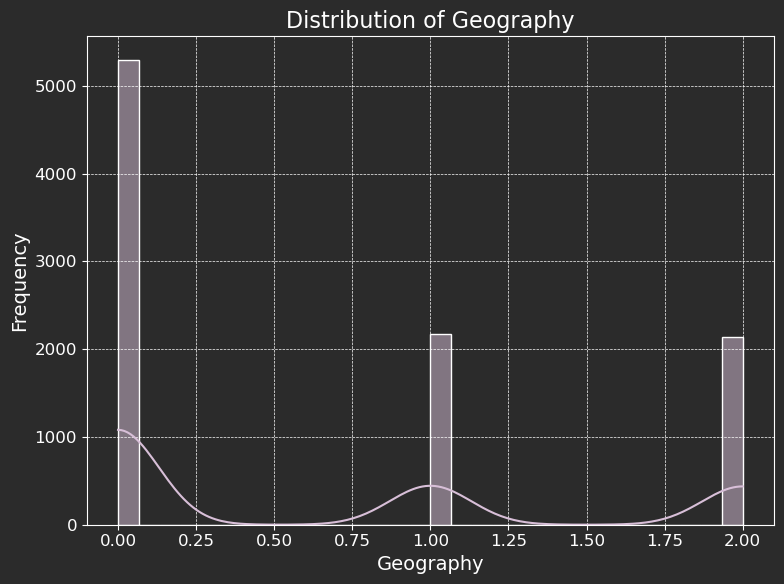

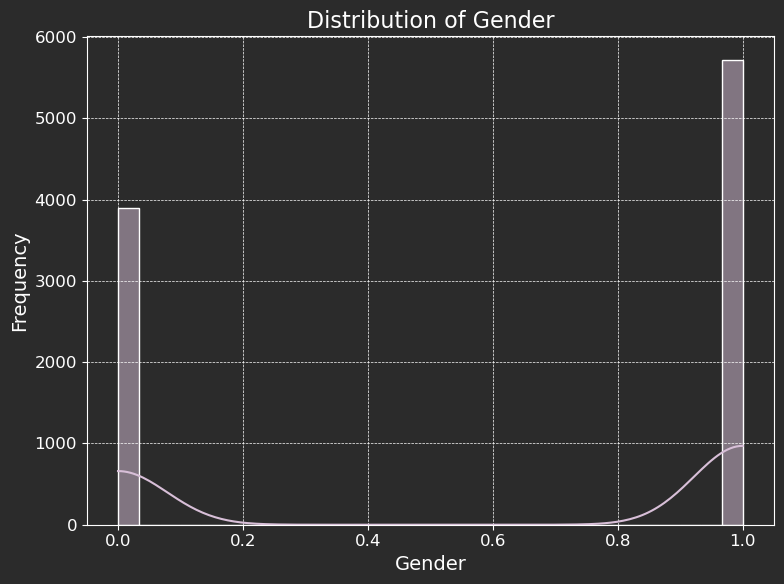

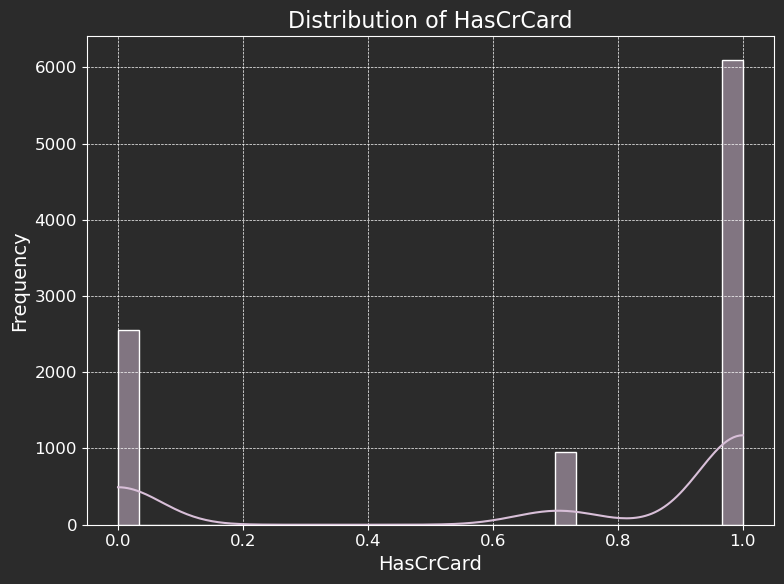

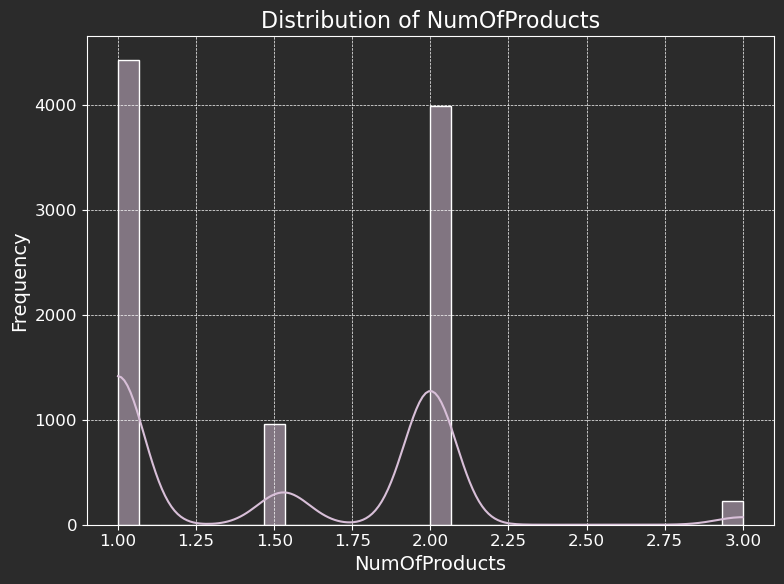

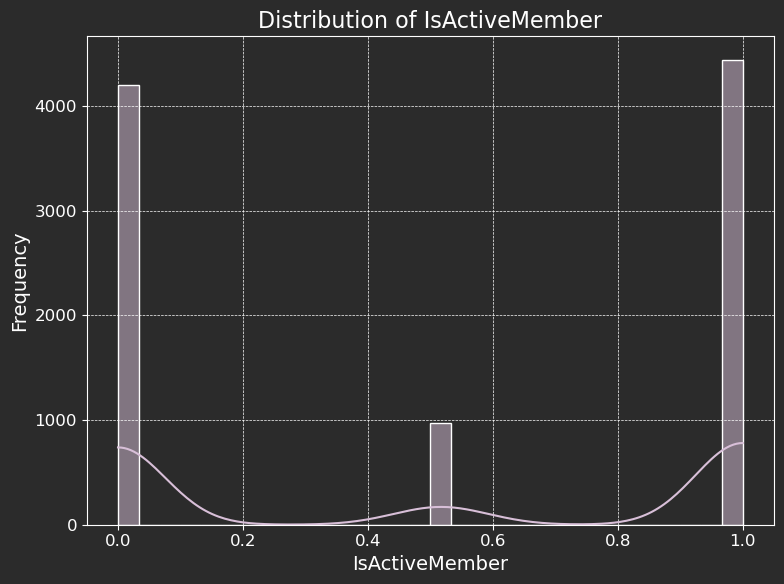

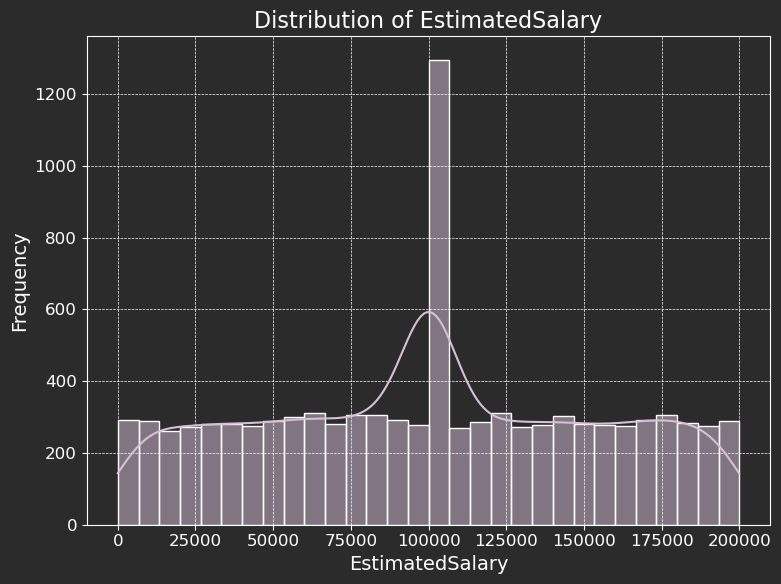

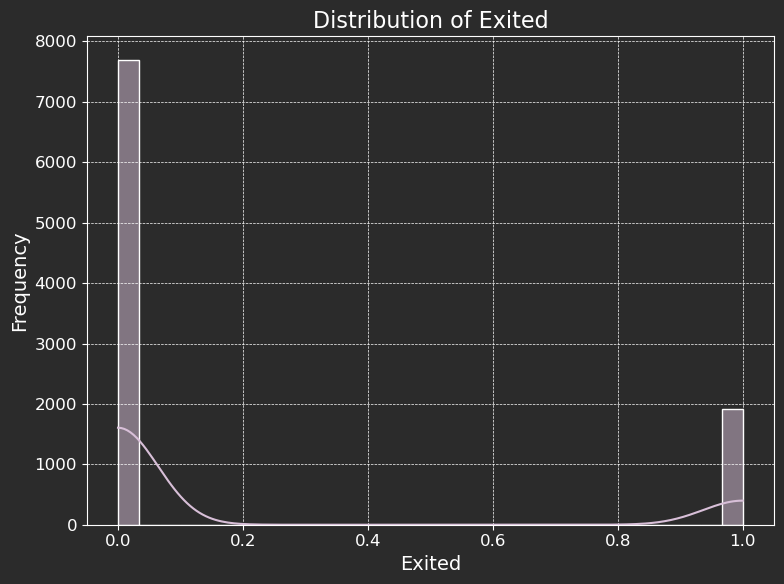

In [164]:
# This graph helps identify any skewness or abnormal patterns in the data and gives a clear idea of the shape of each feature's distribution.


numeric_cols = ['Balance', 'Age', 'CreditScore', 'Tenure', 'Geography', 'Gender', 'HasCrCard', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited'] 
plt.style.use('dark_background')  # Using Matplotlib's built-in dark background style
plt.rcParams['axes.facecolor'] = '#2B2B2B'  # Dark gray background for axes
plt.rcParams['axes.edgecolor'] = 'white'    # White borders for axes
plt.rcParams['figure.facecolor'] = '#2B2B2B'  # Dark gray figure background
plt.rcParams['axes.labelcolor'] = 'white'  # Label color to white for better contrast
plt.rcParams['xtick.color'] = 'white'  # X-axis ticks in white
plt.rcParams['ytick.color'] = 'white'  # Y-axis ticks in white
plt.rcParams['font.size'] = 12  # Increase font size for better readability

# Loop over each numeric column to plot its distribution
for col in numeric_cols:
    plt.figure(figsize=(8,6))  # Larger figure size for better visualization
    sns.histplot(df[col], kde=True, color='thistle', bins=30)  # Custom colors for histogram and KDE
    plt.title(f'Distribution of {col}', fontsize=16, color='white')  # Title with larger font and white color
    plt.xlabel(col, fontsize=14, color='white')  # X-axis label
    plt.ylabel('Frequency', fontsize=14, color='white')  # Y-axis label
    plt.grid(True, color='white', linestyle='--', linewidth=0.5)  # White dashed gridlines
    plt.tight_layout()  # Automatically adjust subplots to fit into figure area
    plt.show()
    print("\n")


### 2.2.2 Box Plots to Identify Outliers

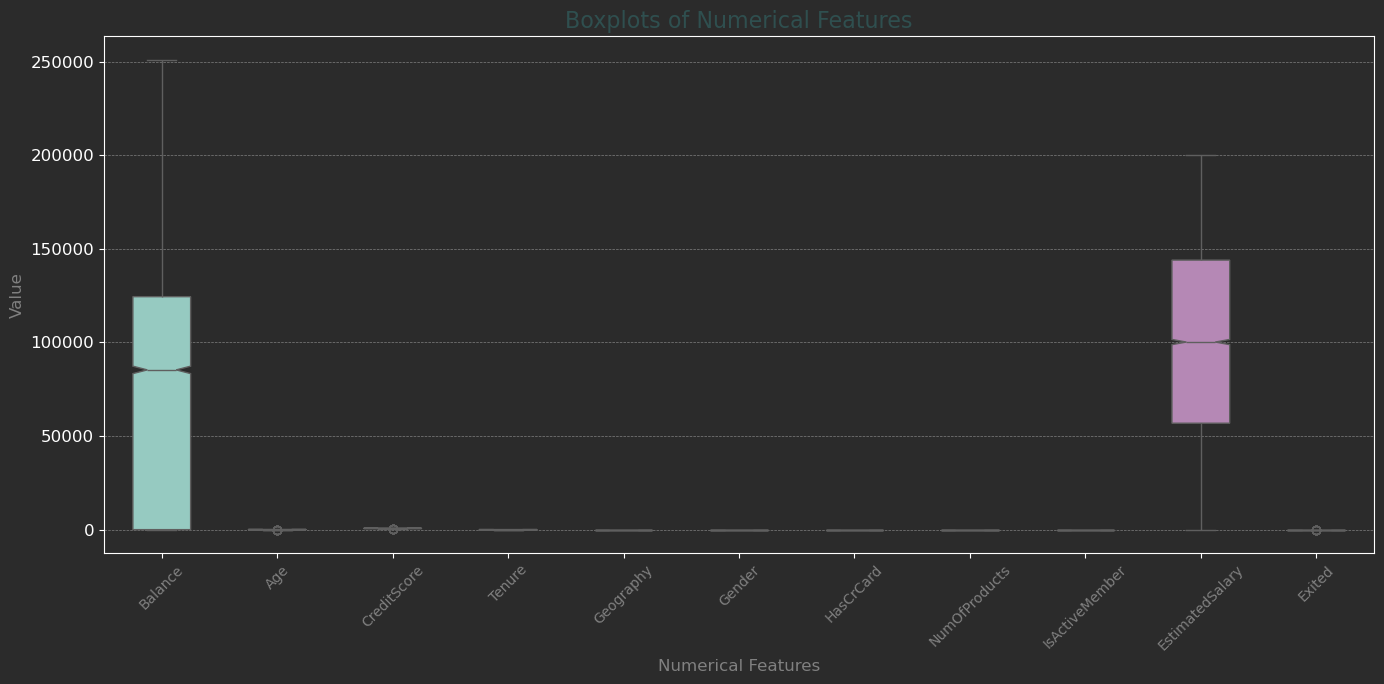

In [165]:
# Boxplots for all numerical features in a single figure
plt.figure(figsize=(14, 7))  # Adjust the figure size for readability
sns.boxplot(data=df[numeric_cols], palette="Set3", width=0.5, notch=True)  # Notched boxplot with a soft color palette
plt.title('Boxplots of Numerical Features', fontsize=16, color='darkslategray')  # Title styling
plt.xlabel('Numerical Features', fontsize=12, color='gray')  # X-axis label
plt.ylabel('Value', fontsize=12, color='gray')  # Y-axis label
plt.xticks(rotation=45, fontsize=10, color='gray')  # Rotate and style X-axis labels for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')  # Dashed gridlines for clarity
plt.tight_layout()  # Ensure all elements fit nicely
plt.show()


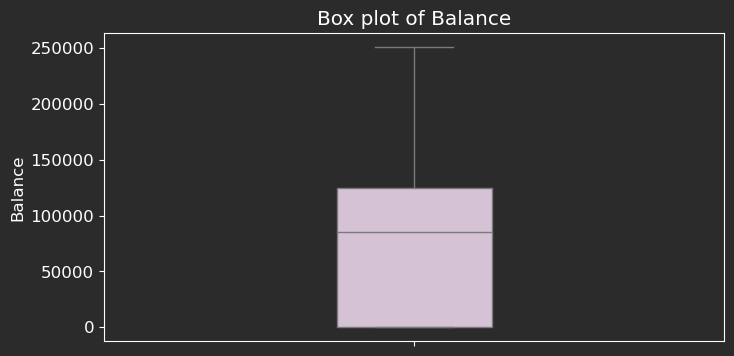

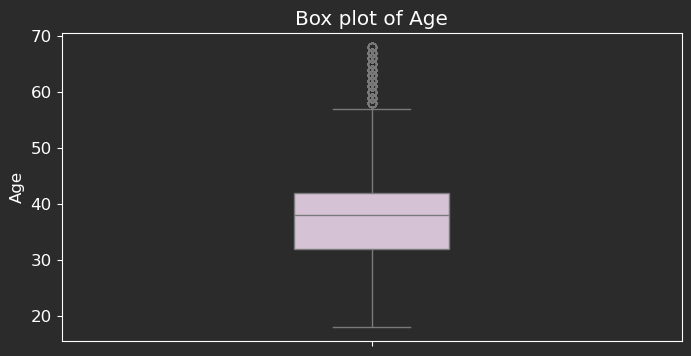

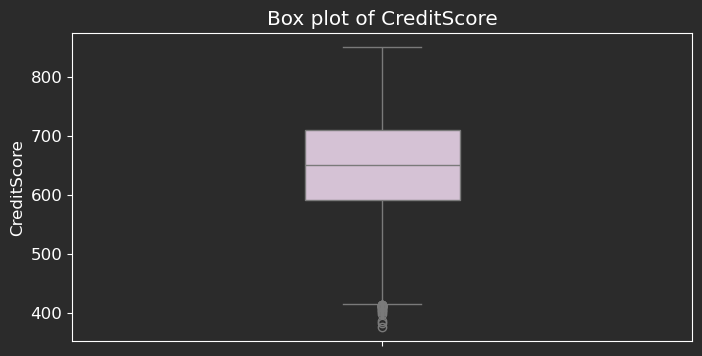

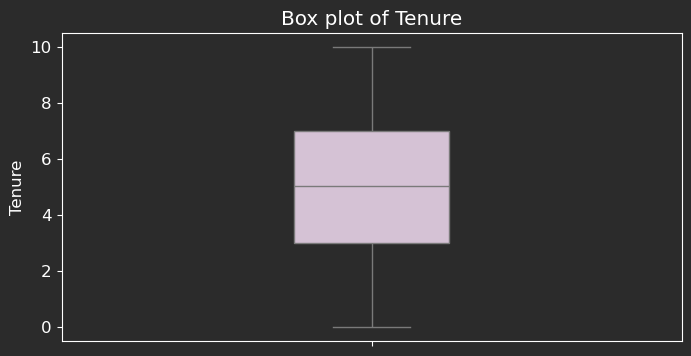

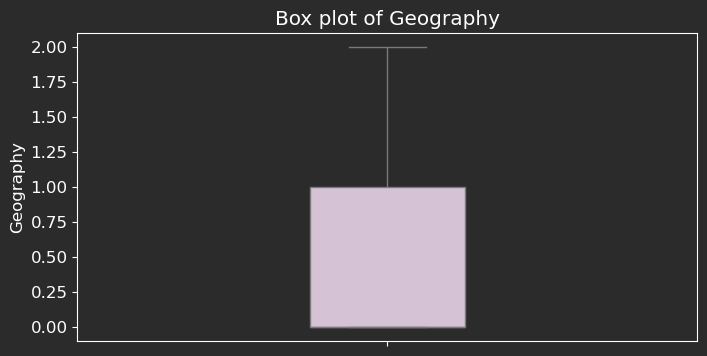

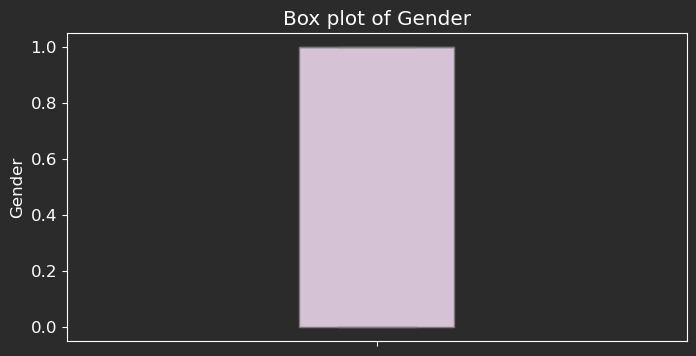

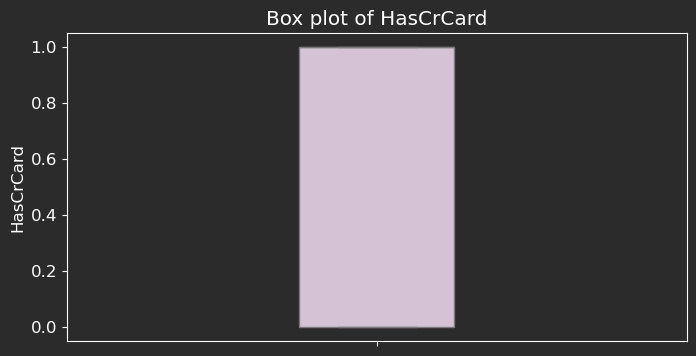

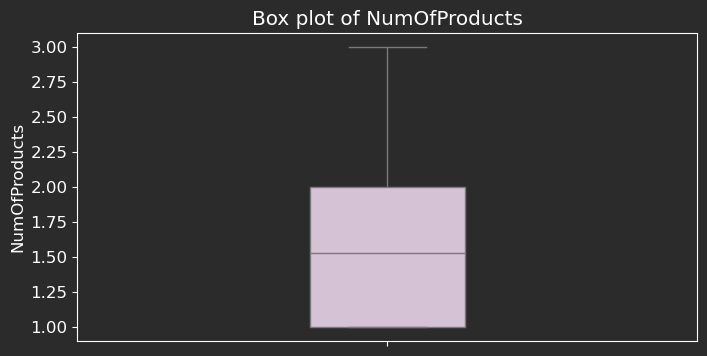

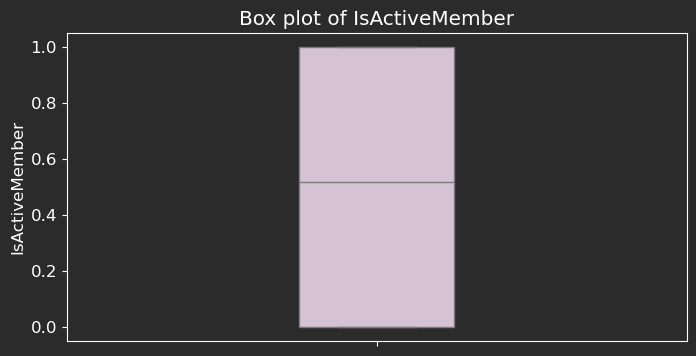

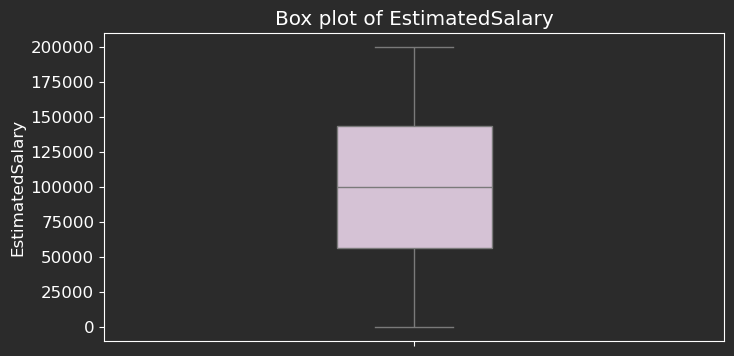

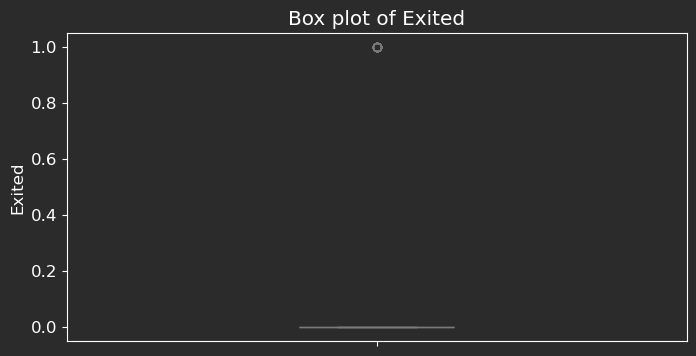

In [166]:
# Box plots provide a summary of a dataset’s distribution, highlighting the median, quartiles, and outliers.
# This is a key visualization for detecting outliers, which may need to be addressed (removed or corrected) before further analysis.

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=df[col], color="thistle", width = 0.25)
    plt.title(f'Box plot of {col}')
    plt.show()
    print("\n")

### 2.2.3 Correlation Heatmap

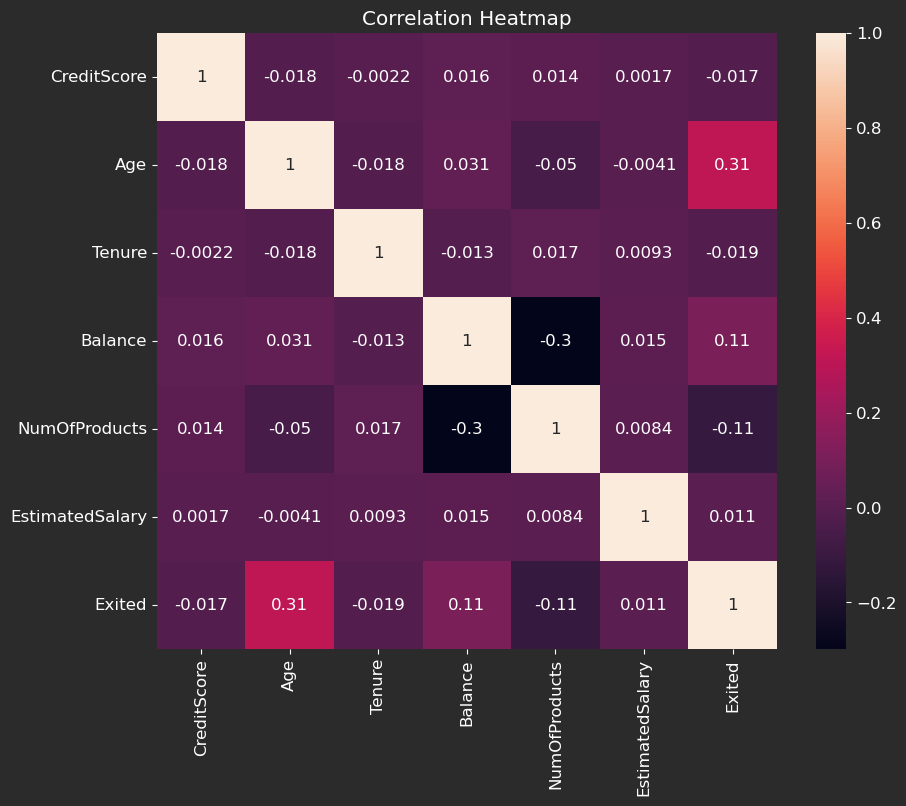

Correlational matrix:
                  CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.018192 -0.002232  0.016084       0.014141   
Age                -0.018192  1.000000 -0.017582  0.030848      -0.050137   
Tenure             -0.002232 -0.017582  1.000000 -0.013212       0.017032   
Balance             0.016084  0.030848 -0.013212  1.000000      -0.298536   
NumOfProducts       0.014141 -0.050137  0.017032 -0.298536       1.000000   
EstimatedSalary     0.001685 -0.004079  0.009321  0.015081       0.008448   
Exited             -0.017029  0.314820 -0.019258  0.108208      -0.111141   

                 EstimatedSalary    Exited  
CreditScore             0.001685 -0.017029  
Age                    -0.004079  0.314820  
Tenure                  0.009321 -0.019258  
Balance                 0.015081  0.108208  
NumOfProducts           0.008448 -0.111141  
EstimatedSalary         1.000000  0.010836  
Exited                  0.010836  1.000000  


In [167]:
'''
This correlational heatmap focuses on the correlation between selected numerical columns and the target variable (Exited), which is the outcome we will be trying to predict in a churn model. 
This is useful if one is interested in understanding which numerical features are more strongly related to churn (the Exited column).
'''

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
correlational_matrix = df[numerical_cols + ['Exited']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlational_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()
print("Correlational matrix:\n", correlational_matrix)


### 2.2.4 Pairplot to Visualize Relationships Between Features

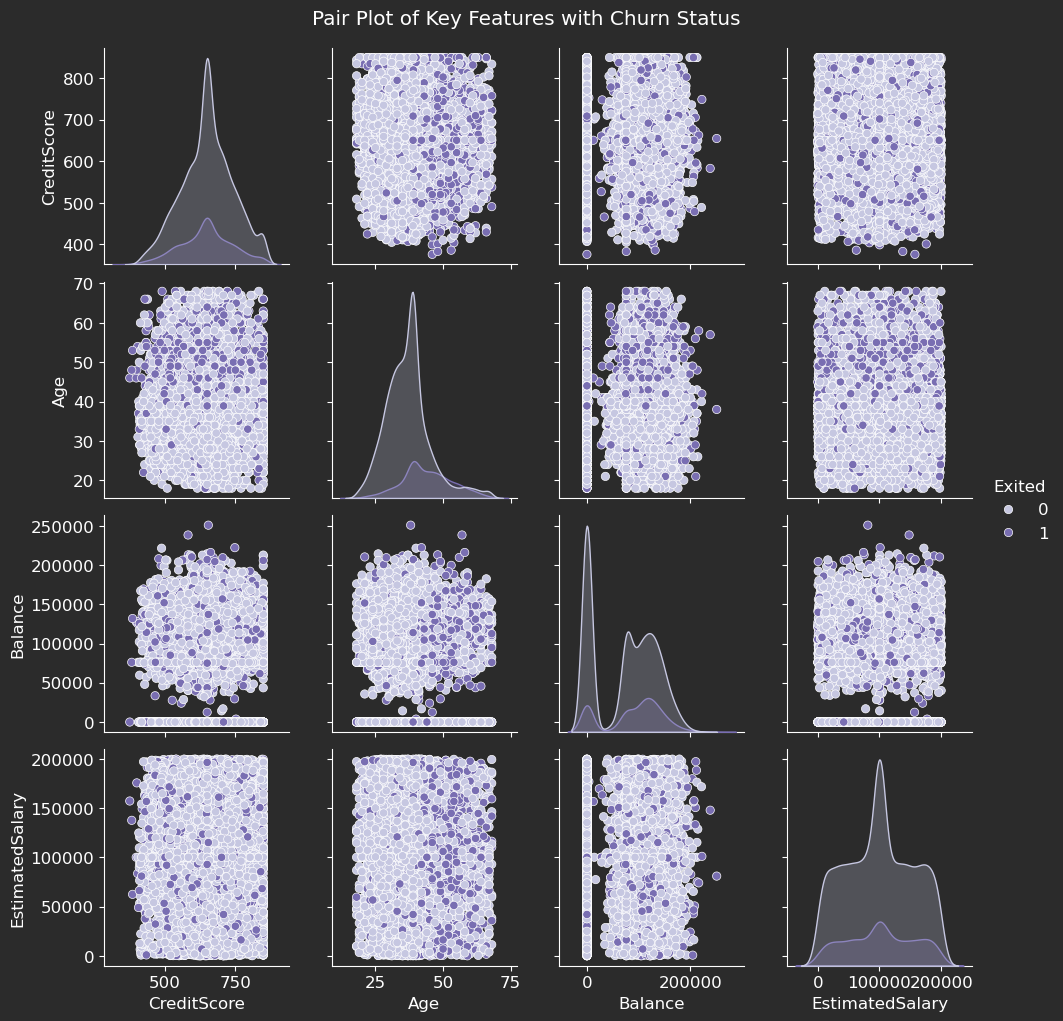

In [168]:
# Pair plots to visualize the relationships between features like CreditScore, Age, Balance, and how they affect Exited.
# Pair plots can help detect non-linear relationships between features and identify clusters of customers with specific characteristics.
sns.pairplot(df, vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], hue='Exited', diag_kind='kde', palette='Purples')
plt.suptitle('Pair Plot of Key Features with Churn Status', y=1.02)
plt.show()

### 2.2.5 Scatter Plot of Age vs Balance with Churn Status

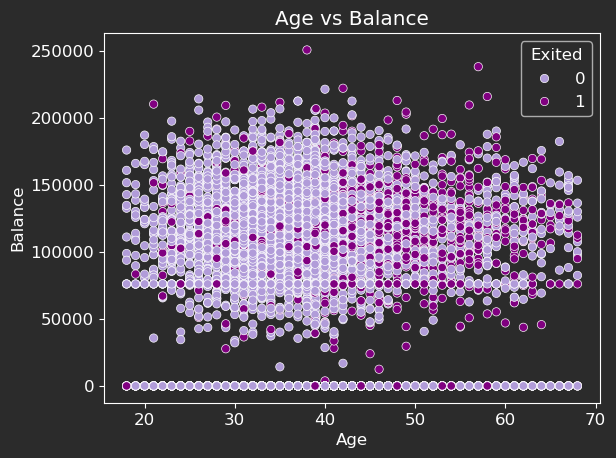

In [169]:
#scatter plot to show the relation of age and balance
purple_palette = {0: '#b19cd9', 1: '#800080'}
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Age vs Balance")
sns.scatterplot(df, x='Age', y='Balance',  hue='Exited', palette=purple_palette, )
plt.show()


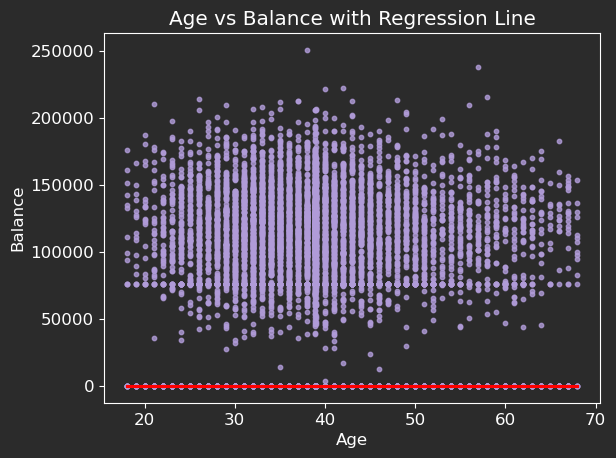

In [170]:
#  adding a regression line to see if there’s any linear relationship between Age and Balance.

sns.regplot(df, x='Age', y='Balance', scatter_kws={'s': 10, 'color': '#b19cd9'}, line_kws={'color': 'red'}, logistic=True)
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Age vs Balance with Regression Line")
plt.show()

### 2.2.6 Geographic Distribution of Churn Rate: A Stacked Comparison of Customers Who Stayed vs Exited

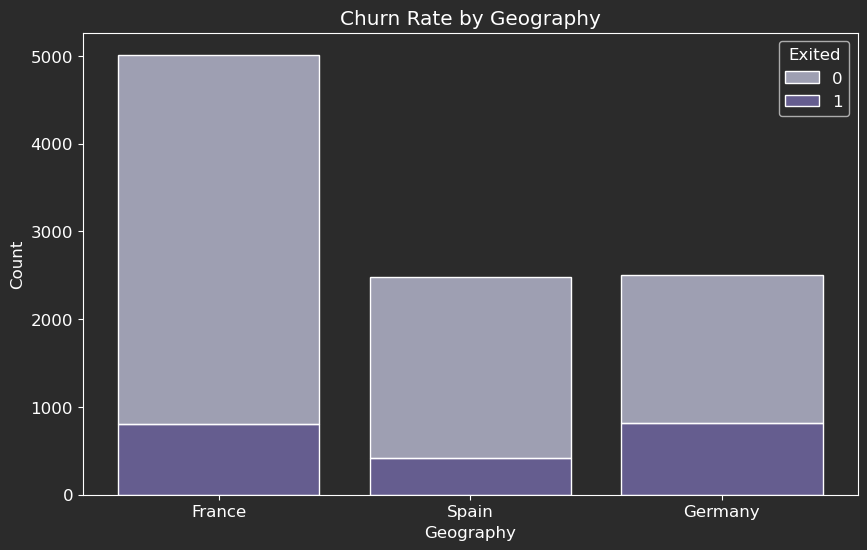

In [171]:
# This plot shows how the churn rate is distributed across different geographies in the dataset, with 
# stacked bars representing the number of customers who exited and those who stayed.

churn_data = pd.read_csv("Churn_Modelling.csv")
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_data, x='Geography', hue='Exited', multiple='stack', shrink=0.8, palette='Purples')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

### 2.2.7. Standard Deviation and Variance of Numerical Features: A Line Plot Analysis

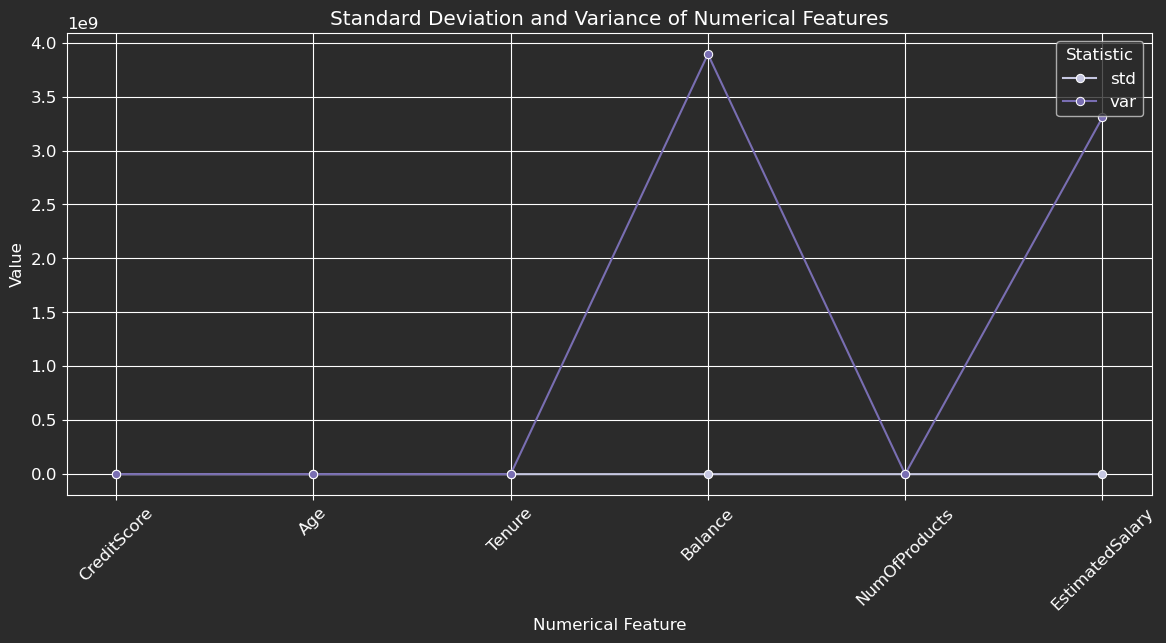

     CreditScore         Age    Tenure       Balance  NumOfProducts  \
std    96.653299   10.487806  2.892174  6.239741e+04       0.581654   
var  9341.860157  109.994084  8.364673  3.893436e+09       0.338322   

     EstimatedSalary  
std     5.751049e+04  
var     3.307457e+09  


In [172]:
'''
The graph of Standard Deviation and Variance of Numerical Features helps us understand the dispersion or spread of the data
for each numerical feature in the dataset
'''
descriptive_stats = churn_data[numerical_cols].agg(['std', 'var'])
# Reshape the data for plotting
descriptive_stats_transposed = descriptive_stats.T.reset_index().melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plot the line graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=descriptive_stats_transposed, x='index', y='Value', hue='Statistic', marker='o', palette='Purples')
plt.title('Standard Deviation and Variance of Numerical Features')
plt.xlabel('Numerical Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(descriptive_stats)


### 2.2.8. Range Analysis of Numerical Features: Visualizing the Spread of Data

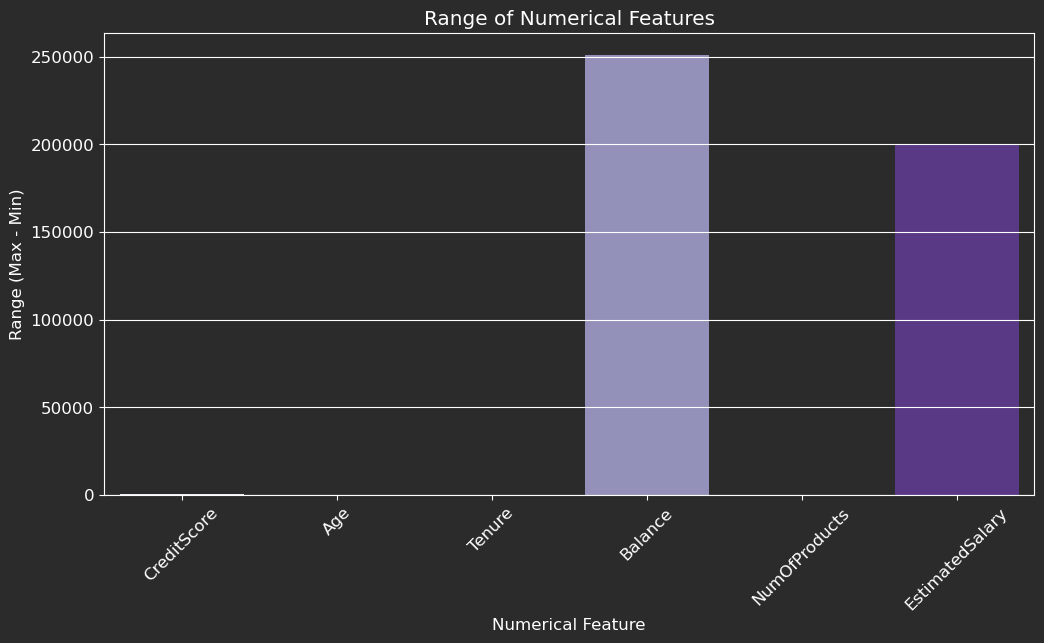

Range:
 CreditScore           500.00
Age                    74.00
Tenure                 10.00
Balance            250898.09
NumOfProducts           3.00
EstimatedSalary    199980.90
dtype: float64


In [173]:
'''
The graph of Range of Numerical Features helps us analyze the spread or extent of each numerical feature in the dataset 
by showing the difference between the maximum and minimum values of each feature.
'''

range_stats = churn_data[numerical_cols].apply(lambda x: x.max() - x.min())

plt.figure(figsize=(12, 6))
sns.barplot(x=range_stats.index, y=range_stats.values, hue = range_stats.index, palette='Purples')
plt.title('Range of Numerical Features')
plt.xlabel('Numerical Feature')
plt.ylabel('Range (Max - Min)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("Range:\n", range_stats)

### 2.2.9. Analyzing the Distribution of Customer Tenure Across Geographies and Churn Status

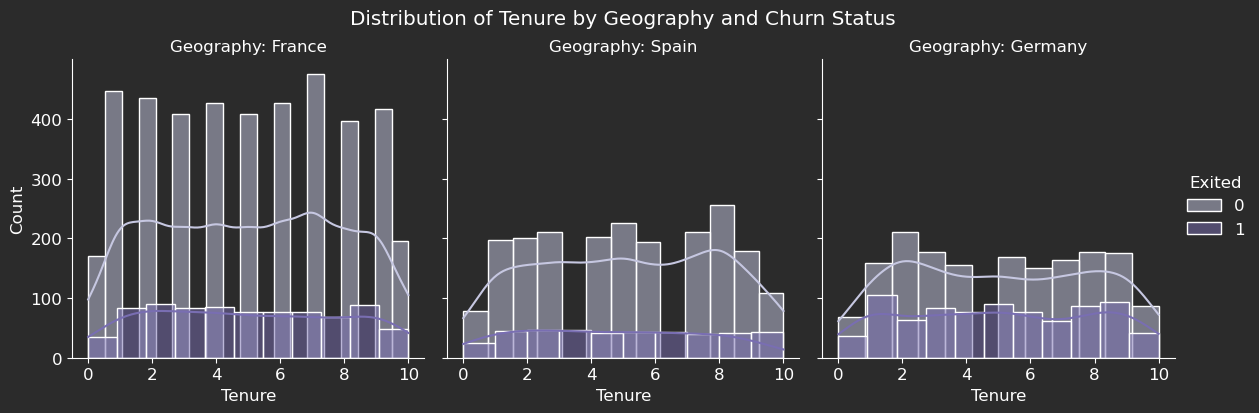

In [174]:
'''
This visualization helps us understand how customer tenure influences churn within different geographical regions. It can reveal whether certain regions 
have higher churn rates for customers with shorter tenures, or if regions with longer tenures experience more churn. This kind of analysis can guide businesses 
in identifying specific geographic locations where customer retention efforts may need to be focused based on tenure patterns.
'''

# Facet grid for 'Tenure' by 'Geography' and 'Exited'
# This analysis helps understand how customer tenure influences churn within different geographical locations.

g = sns.FacetGrid(churn_data, col='Geography', hue='Exited',palette='Purples', height=4, aspect=1)
g.map(sns.histplot, 'Tenure', kde=True)
g.add_legend()
g.set_titles('Geography: {col_name}')
plt.suptitle('Distribution of Tenure by Geography and Churn Status', y=1.03)
plt.show()

### 2.2.10 Violin Plots

#### 2.2.10.1 Distribution of Account Balance by Customer Churn Status

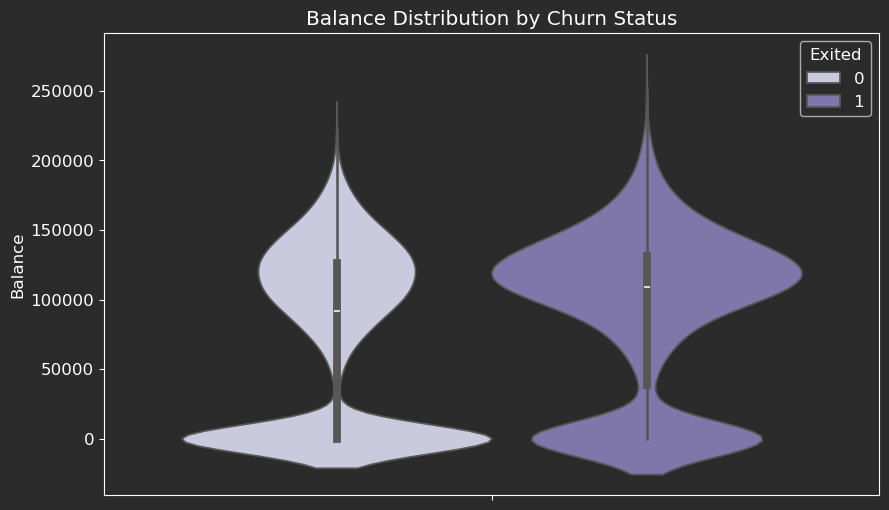

In [175]:
# We are using violin plots to show the distribution and density of feature'Balance' by Exited.
#Violin plots combine box plots and density plots, providing a comprehensive view of data distribution and concentration.

plt.figure(figsize=(10, 6))
sns.violinplot(data=churn_data, hue='Exited', y='Balance', palette='Purples')
plt.title('Balance Distribution by Churn Status')
plt.show()

#### 2.2.10.2 Distribution of Credit Scores by Churn Status

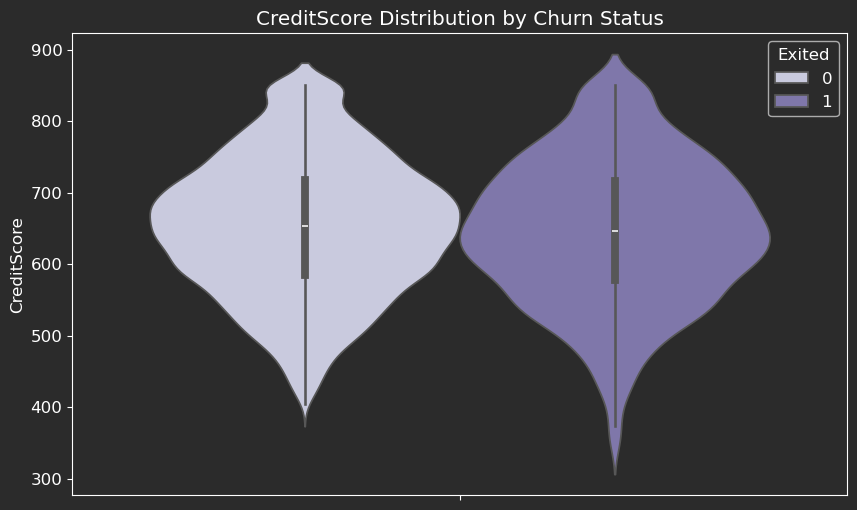

In [176]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=churn_data, hue='Exited', y='CreditScore', palette='Purples')
plt.title('CreditScore Distribution by Churn Status')
plt.show()

# 3. Applying Machine Learning Algorithm Using the Scikit-Learn Library

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 3.1 Defining Target and Feature Variable

In [178]:
# Definine target and features variable
X = df.drop('Exited', axis = 1) 
y = df['Exited'] # y is target variable

### 3.2 Splitting Data

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")

# Ensure consistency in sizes
if X_train_scaled.shape[0] != y_train.shape[0]:
    # Aligning sizes (if any rows are missing)
    X_train_scaled = X_train_scaled[:len(y_train)]
    

X_train_scaled shape: (7689, 14)
y_train shape: (7689,)


### 3.3 Standardizing the Data

In [180]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.4 Training model using Logistic Regression

In [181]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.4.1 Accuracy, Confusion Matrix and ROC of the Logistic Regression Model

Accuracy: 80.66%


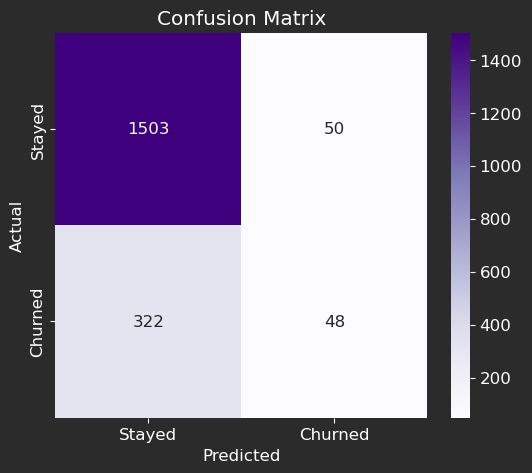

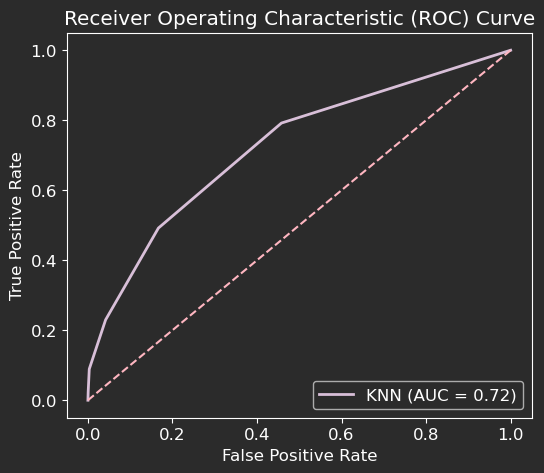

In [182]:
# Accuracy of the model
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve to see how the model predicts
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='thistle', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightpink', linestyle='--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 3.4.2 Classification Report for the Logistic Model

In [183]:
print(f"Classification Report: \n\n{classification_report(y_test, y_pred)}")

Classification Report: 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1553
           1       0.49      0.13      0.21       370

    accuracy                           0.81      1923
   macro avg       0.66      0.55      0.55      1923
weighted avg       0.76      0.81      0.76      1923



### 3.5 Training model using KNN

In [184]:
# Proceed with model training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_scaled)

### 3.5.1 Accuracy, Confusion Matrix and ROC of the KNN model

Accuracy: 0.8179927197087884


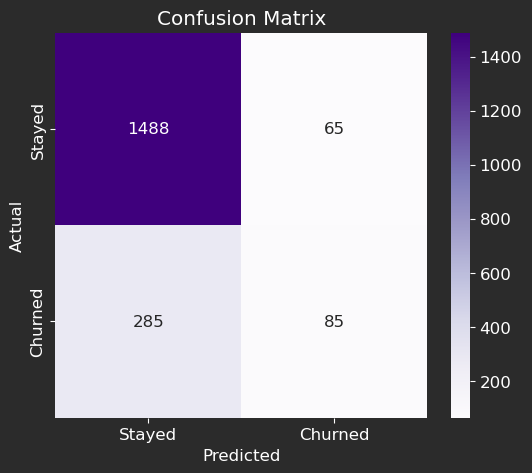

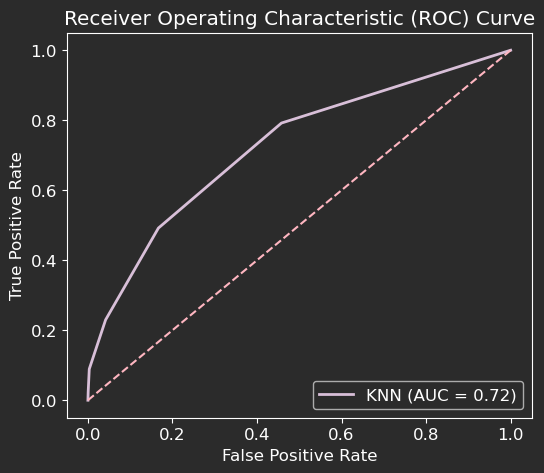

In [185]:
# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {knn_accuracy}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve to see how the model predicts
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='thistle', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightpink', linestyle='--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 3.5.2 Classification Report for the KNN model

In [186]:
print(f"Classification Report: \n\n{classification_report(y_test, y_pred_knn)}")

Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1553
           1       0.57      0.23      0.33       370

    accuracy                           0.82      1923
   macro avg       0.70      0.59      0.61      1923
weighted avg       0.79      0.82      0.79      1923



# 4. Conclusion



In [187]:
summary = {'Model Accuracy': {'Logistic Regression Model': logreg_accuracy, 'KNN Model': knn_accuracy}}
summary = pd.DataFrame(summary)
summary

,Model Accuracy
Logistic Regression Model,0.806552
KNN Model,0.817993


### 4.1 Defining the evaluation metrics we used:
:

1. **Precision**  
   Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It indicates how many of the predicted churners were actual churners.  
   $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

2. **Recall (Sensitivity/True Positive Rate)**  
   Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It shows how well the model identifies actual churners.  
   $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

3. **F1-Score**  
   The F1-score is the harmonic mean of Precision and Recall, providing a balance between the two. It is useful when there is an uneven class distribution.  
   $$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

4. **Accuracy**  
   Accuracy measures the proportion of correct predictions (both positive and negative) out of the total predictions made by the model.  
   $$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}$$

5. **ROC Curve (Receiver Operating Characteristic Curve)**  
   The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate at various threshold levels. It shows how well the model distinguishes between classes. A good model will have a curve closer to the top-left corner.  
   - **AUC-ROC (Area Under the Curve):** The area under the ROC curve indicates the overall ability of the model to discriminate between positive and negative classes. A value of 1.0 indicates perfect classification, while 0.5 indicatnce to the majority class.
ance to the majority class.
rtance to the majority class.


### 4.2 Comparing the results of the evaluation metrics for both the logistic model and the KNN model:

In our dataset, the primary objective is to predict Churn, which corresponds to the target variable being 1. Therefore, when comparing the evaluation metrics for the trained models, we will focus on how well each model performs specifically in predicting instances where the target variable equals 1 (Churners). This approach helps us understand the model’s ability to correctly identify and classify those at risk of churn, which is the key business goal.

1. **Precision**:
    - Logistic Model: 49%
    - KNN model: 57%

2. **Recall**:
    - Logistic Model: 13%
    - KNN model: 23%
      
3. **F1-score**:
    - Logistic Model: 21%
    - KNN model: 33%
  
4. **Accuracy**:
    - Logistic Model: 80.66%
    - KNN model: 81.7%
   
5. **ROC**:
    - Logistic Model: 72%
    - KNN model: 72%
  
### 4.3 Concluding the results based on the observed comparison:
We can observe that the performance of our KNN model significantly outperforms the Logistic Regression model. Therefore, we will choose the KNN model for deployment, as it demonstrates superior ability to correctly classify the target variable.
    